## **Name: Nhi Luu**
## **Date: 12/04/2022**
## **Project 6**: **Pet Finder API**

1.   Visit www.petfinder.com to learn more about the site
2.   Learn more about its API | https://www.petfinder.com/developers/
<li>Get an API Key (and its Secret code) | Sign up for an account first



In [ ]:
#
# Request your API Key and Secret code from petfinder |  https://www.petfinder.com/developers/
# Replace "abc" and "xyz" with your key and code

# API_KEY="4vHbW0xQAgFeCxXiOhz2ZqGG9mQhPr6AR2m7yZBiuFSztAHKwT"
# SECRET= "UTcUgg5jt6he9svLBAe42wreq5S0JfoWpSEEEDpT"

API_KEY="qnmRQIUcQ4CWP8RaGAFHSdlJAvNWs2vLlJoHrhk1rx8p2DXNLj"
SECRET= "oUZ0OIOdXtvYwvbxqMphVGTnG1w4ZRb1D6JDnc9G"

In [ ]:
from urllib.request import urlretrieve
import requests
from pprint import PrettyPrinter
import pandas as pd

In [ ]:
# DON'T MODIFY any info in this cell.  The code will work just fine.

pp = PrettyPrinter()

headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = 'grant_type=client_credentials&client_id='+ API_KEY

response = requests.post('https://api.petfinder.com/v2/oauth2/token', headers=headers, data=data).json()
#pp.pprint(response)

#print(type(response))
#print(response.get('token_type'))
#print(response.get('access_token'))

my_token_type = response.get('token_type')
my_access_token = response.get('access_token')

headers = {
    'Authorization': my_token_type + ' ' + my_access_token
}

In [ ]:
# About to obtain a list of places where we can adopt animals
url_org="https://api.petfinder.com/v2/organizations"

r = requests.get(url_org, headers=headers)
json = r.json()
print(json)

{'organizations': [{'id': 'GA762', 'name': 'Special Touch Animal Rescue', 'email': 'STARRadopt@aol.com', 'phone': '(404) 983-3581', 'address': {'address1': None, 'address2': None, 'city': 'Acworth', 'state': 'GA', 'postcode': '30102', 'country': 'US'}, 'hours': {'monday': None, 'tuesday': None, 'wednesday': None, 'thursday': None, 'friday': None, 'saturday': None, 'sunday': None}, 'url': 'https://www.petfinder.com/member/us/ga/acworth/special-touch-animal-rescue-ga762/?referrer_id=9e2b9d43-6f24-4ce1-8f27-11bce8dcd4f3', 'website': None, 'mission_statement': 'We are a private foster home group. We are NOT a shelter or facility. Our dogs come from licensed animal...', 'adoption': {'policy': None, 'url': None}, 'social_media': {'facebook': None, 'twitter': None, 'youtube': None, 'instagram': None, 'pinterest': None}, 'photos': [], 'distance': None, '_links': {'self': {'href': '/v2/organizations/ga762'}, 'animals': {'href': '/v2/animals?organization=ga762'}}}, {'id': 'MO556', 'name': 'Montg

In [ ]:
pp.pprint(json)

{'organizations': [{'_links': {'animals': {'href': '/v2/animals?organization=ga762'},
                               'self': {'href': '/v2/organizations/ga762'}},
                    'address': {'address1': None,
                                'address2': None,
                                'city': 'Acworth',
                                'country': 'US',
                                'postcode': '30102',
                                'state': 'GA'},
                    'adoption': {'policy': None, 'url': None},
                    'distance': None,
                    'email': 'STARRadopt@aol.com',
                    'hours': {'friday': None,
                              'monday': None,
                              'saturday': None,
                              'sunday': None,
                              'thursday': None,
                              'tuesday': None,
                              'wednesday': None},
                    'id': 'GA762',
                  

In [ ]:
# Next: Carefully review the json (result) from my "organizations" API call.  
# Visit the Developers page at petfinder.com to learn more about the API.  
# You will need to make additional API calls and address a set of questions next.   

In [ ]:
#-- Execution time check:

from timeit import default_timer as timer
startTime = timer()
def time_exe():
    """This function checks for execution time"""
    executionTime = (timer() - startTime)
    print(f'\n--------------------------\nExecution time in seconds: {executionTime:.10f}')   

time_exe()


--------------------------
Execution time in seconds: 0.0001260250


Address the following questions


1. What type of animals are available for adoption in Virginia?
<li> What organizations can I adopt from in Maryland?
<li> How many dogs are available (for adoption) in Rockville?
<li> Display the list of available dogs and breeds in a particular zip code (ask user for the zip code) 
<li> <b>Include 5 additional enhancements of your choice</b>



## Question 1: What type of animals are available for adoption in Virginia?

In [ ]:
startTime = timer()

#GET pattern: GET https://api.petfinder.com/v2/{CATEGORY}/{ACTION}?{parameter_1}={value_1}&{parameter_2}={value_2}

#What type of animals are available for adoption in Virginia?
result_q1 = []
for page in range(1,80):
    question1_url=f"https://api.petfinder.com/v2/animals?state=VA&limit=100&page={page}"
    r1 = requests.get(question1_url, headers=headers)
    json_q1 = r1.json()
    for i in range (0,len(json_q1['animals'])):
        if (json_q1['animals'][i]['contact']['address']['state'] == 'VA'):
            result_q1.append(json_q1['animals'][i]['type'])
#{'count_per_page': 100, 'total_count': 7835, 'current_page': 1, 'total_pages': 79, '_links': {'next': {'href': '/v2/animals?limit=100&location=VA&page=2'}}}
# animals= ['animal1':[info], 'animal2':[info], 'animal3':[info]]
for x in set(result_q1):
  print(x)

#Time check
time_exe()

Rabbit
Dog
Cat

--------------------------
Execution time in seconds: 69.4662465900


## Question 2: What organizations can I adopt from in Maryland?

In [ ]:
startTime = timer()

#What organizations can I adopt from in Maryland?

result_q2 = []
for page in range(1,3):
    question2_url=f"https://api.petfinder.com/v2/organizations?state=MD&limit=100&page={page}"
    r2 = requests.get(question2_url, headers=headers)
    json_q2 = r2.json()
    # pp.pprint(json_q2)
    for i in range (0,len(json_q2['organizations'])):
        result_q2.append(json_q2['organizations'][i]['name'])
for x in set(result_q2):
  print(x)
print(f'\nThere are {len(result_q2)} organizations we can adopt from in MD.')
time_exe()

Reach Out Rescue & Resources
Canine Humane Network
McWag Rescue
Just One More Kitty
The Boxer Transfer Network
Friends for Life Cat Rescue, Inc.
The Lion's Den Rescue
MID ATLANTIC CHINESE SHAR PEI RESCUE OPERATION, INC
Shadow Cats TNR, Inc
DobsonTNR (Trap,Neuter,Return/Rescue)
Bengal Rescue Network (501c3)
Patuxent Animal Welfare Society, Inc. (PAWS)
Animal Safe Haven & Adoptions, Inc.
S&D K9 Rehabilitation
Animal Welfare League of Frederick County
Tip Me Frederick
SPCA of Anne Arundel County
Eastern Shore Rabbit Rescue and Education Center
Crits For Cats
Animal Welfare League of Montgomery County
Animal Welfare League of Queen Anne's County
Almost Home Dog Rescue
The Furry Paws Foster Inn
All Shepherd Rescue
Reeds Rescue
Pets-4-Pets Cats Rescue, Inc.
Anne Arundel County Animal Care & Control
Pitties and Purrs
Cats R Us, Inc
Cuddles Cat Rescue
Adopt a Homeless Animal Rescue
City of Greenbelt  Animal Control
Second Hope Rescue
Harford Hounds,Inc
Pardoned Paws Rescue Inc
Animal Allies Re

## Question 3: How many dogs are available (for adoption) in Rockville?

In [ ]:
# # #Check page
# url_org="https://api.petfinder.com/v2/animals?location=MD&type=Dog&status=adoptable&limit=100"

# r = requests.get(url_org, headers=headers)
# json = r.json()
# pp.pprint(json)

In [ ]:
startTime = timer()

# ## How many dogs are available (for adoption) in Rockville?
result_q3 = 0
count = 0
for page in range(1,48):
    question3_url=f"https://api.petfinder.com/v2/animals?location=MD&type=Dog&status=adoptable&limit=100&page={page}"
    r3 = requests.get(question3_url, headers=headers)
    json_q3 = r3.json()
    for i in range (0,len(json_q3['animals'])):
      #print(json_q3['animals'][i]['contact']['address']['city'])
      if (json_q3['animals'][i]['contact']['address']['city'] == 'Rockville'):
        count+=1
print(f'Dogs available for adoption in Rockville, MD: {count}')

time_exe()

Dogs available for adoption in Rockville, MD: 54

--------------------------
Execution time in seconds: 45.0574948600


## Question 4: Display the list of available dogs and breeds in a particular zip code (ask user for the zip code)

In [ ]:
startTime = timer()


# Check for total pages for each 100 results per page

zipcode = input('Enter the zipcode: ')

postcode = zipcode
print('\nPlease wait.....\n')

url4=f"https://api.petfinder.com/v2/animals?location={postcode}&type=Dog&limit=100"
r = requests.get(url4, headers=headers)
json = r.json()
# pp.pprint(json)
# The number of total page is 
totalpage=int( json['pagination']['total_pages'])
# print(totalpage)

# Getting results
result_q4 = []

# for everypage (note: totalpage+1)
for page in range(1,totalpage+1):
    question4_url=f"https://api.petfinder.com/v2/animals?location={postcode}&type=Dog&limit=100&page={page}"
    r4 = requests.get(question4_url, headers=headers)
    json_q4 = r4.json()
    #for simplicity, only check for primary breed
    for i in range (0,len(json_q4['animals'])):
        if (json_q4['animals'][i]['contact']['address']['postcode'] == postcode):
            result_q4.append(json_q4['animals'][i]['breeds']['primary'])

for x in set(result_q4):
  print(x)
print(f'\n Number of available dogs and breeds in zipcode {postcode}: {len(result_q4)}')

time_exe()

Enter the zipcode: 20850

Please wait.....

Pug
Jack Russell Terrier
Lhasa Apso
Chihuahua
Boxer
Bichon Frise
Dachshund
Pomeranian
Mastiff
Great Pyrenees
Miniature Pinscher
Yorkshire Terrier
Anatolian Shepherd
Rat Terrier

 Number of available dogs and breeds in zipcode 20850: 19

--------------------------
Execution time in seconds: 113.1428334950


# 5. Include 5 additional enhancements of your choice

Enhancement 1: Adult cats that are Domestic Short Hair breed

Enhancement 2: Cats that are declawed and spayed/neutered 

Enhancement 3: Cats that are female and adoptable  

Enhancement 4: Cats that are within 100 miles of distance from Maryland   

Enhancement 5: Print picture of the cat(s)

In [ ]:
catbreeds=f"https://api.petfinder.com/v2/types/cat/breeds"
r = requests.get(catbreeds, headers=headers)
json = r.json()
print(json)
# pp.pprint(json)

{'breeds': [{'name': 'Abyssinian', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'American Bobtail', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'American Curl', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'American Shorthair', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'American Wirehair', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Applehead Siamese', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Balinese', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Bengal', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Birman', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Bombay', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'British Shorthair', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Burmese', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Burmilla', '_links': {'type': {'href': '/v2/types/cat'}}}, {'name': 'Calico', '_links': {'type': {'href':

Name: Martha
Description: Martha is a kind and gentle soul. She was left on the streets with no front claws and expected to...
Age: Adult
Age: Female
Description: Domestic Short Hair
Color primary: None
Color secondary: None
Contact: None, Hershey, PA
Image (click on link): https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/58957200/1/?bust=1669954746&width=300



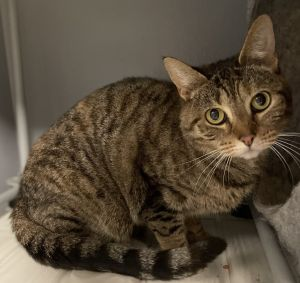


---------------------------------------------------------------

Name: Poppit
Description: This voluptuous girl somehow found herself at a rural kill shelter. One look at her worried face was all it...
Age: Adult
Age: Female
Description: Domestic Short Hair
Color primary: None
Color secondary: None
Contact: None, Fairfax, VA
Image (click on link): https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/58628089/1/?bust=1669652564&width=300



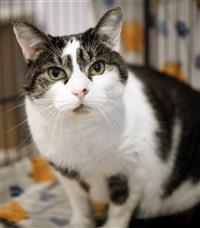


---------------------------------------------------------------



In [ ]:
# Check for total pages for each 100 results per page
from google.colab import files as FILE
import os
from IPython import display
from IPython.display import Image
from IPython.display import display

url5=f"https://api.petfinder.com/v2/animals?type=Cat&age=adult&gender=female&breed=Domestic Short Hair&declawed=true&status=adoptable&size=small&spayed_neutered=true&location=MD&distance=100&limit=100"
r = requests.get(url5, headers=headers)
json = r.json()
# pp.pprint(json)

# The number of total page is 
totalpage=int(json['pagination']['total_pages'])
#print(totalpage)

# # Getting results
result_q5 = []



# # for everypage (note: totalpage+1)
for page in range(1,totalpage+1):
    question5_url=f"https://api.petfinder.com/v2/animals?type=Cat&age=adult&breed=Domestic Short Hair&gender=female&declawed=true&status=adoptable&size=small&spayed_neutered=true&location=MD&distance=100&limit=100&page={page}"
    r5 = requests.get(question5_url, headers=headers)
    json_q5 = r5.json()
    #for simplicity, only check for primary breed
    # print("The cats fit the criteria: ")
    for i in range (0,len(json_q5['animals'])):
        print(f"Name: {json_q5['animals'][i]['name']}")
        print(f"Description: {json_q5['animals'][i]['description']}")
        print(f"Age: {json_q5['animals'][i]['age']}")
        print(f"Age: {json_q5['animals'][i]['gender']}")
        print(f"Description: {json_q5['animals'][i]['breeds']['primary']}")
        print(f"Color primary: {json_q5['animals'][i]['colors']['primary']}")
        print(f"Color secondary: {json_q5['animals'][i]['colors']['secondary']}")
        print(f"Contact: {json_q5['animals'][i]['contact']['address']['address1']}, {json_q5['animals'][i]['contact']['address']['city']}, {json_q5['animals'][i]['contact']['address']['state']}")
        print(f"Image (click on link): {json_q5['animals'][i]['photos'][0]['medium']}")
        img_name = f"{json_q5['animals'][i]['name']}.jpg"
        img_data = requests.get(json_q5['animals'][i]['photos'][0]['medium']).content
        with open(img_name, 'wb') as handler:
            handler.write(img_data)
        print('')
        x = Image(filename=f"/content/{img_name}") 
        display(x)
        print(f"\n---------------------------------------------------------------\n")